In [25]:
import zipfile as zp
import pandas as pd

dz = zp.ZipFile("/content/2.zip")
data = pd.read_csv(dz.open("train_and_test2.csv"))
data_ = data.copy()

data.head(10)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
5,6,28.0,8.4583,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1.0,0,0,0
6,7,54.0,51.8625,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,0
7,8,2.0,21.0750,0,3,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
8,9,27.0,11.1333,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
9,10,14.0,30.0708,1,1,0,0,0,0,0,...,0,0,0,2,0,0,0.0,0,0,1


In [26]:
for i in data.columns:
  if i.startswith("zero"):
    data.drop(i, axis = 1, inplace = True)

data.head(10)

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0
5,6,28.0,8.4583,0,0,0,3,1.0,0
6,7,54.0,51.8625,0,0,0,1,2.0,0
7,8,2.0,21.0750,0,3,1,3,2.0,0
8,9,27.0,11.1333,1,0,2,3,2.0,1
9,10,14.0,30.0708,1,1,0,2,0.0,1


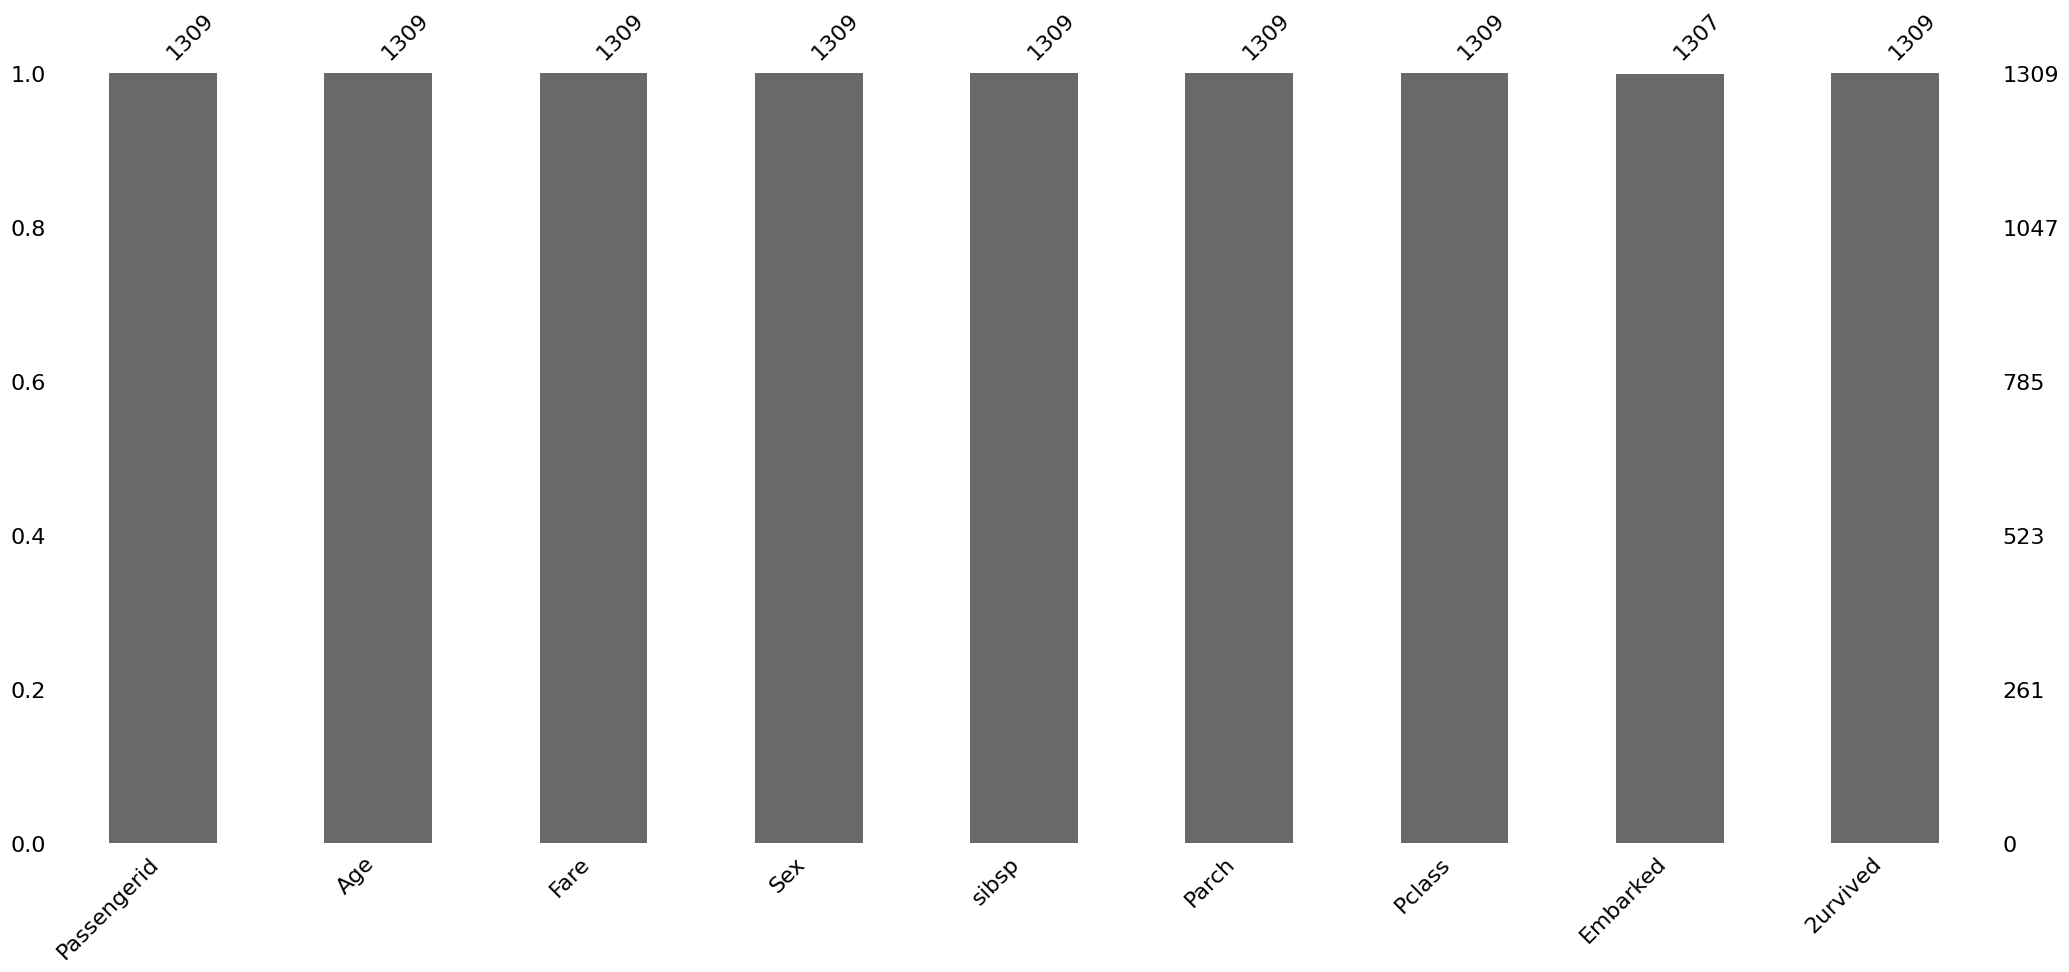

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
2urvived       0
dtype: int64


In [27]:
import missingno as ms
import matplotlib.pyplot as plt

ms.bar(data)
plt.show()

print(data.isnull().sum())

#Embarked contains 2 null values

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Embarked     1307 non-null   float64
 8   2urvived     1309 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.2 KB


In [29]:
data.describe()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1307.000000,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.385027,2.294882,1.492731,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.865560,0.837836,0.814626,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


In [30]:
data.fillna(data["Embarked"].median(), inplace = True)

data["Embarked"].isnull().sum()

0

In [31]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', '2urvived'],
      dtype='object')

In [32]:
data.drop(columns = ["Passengerid"], axis = 1, inplace = True)

In [33]:
from sklearn.model_selection import train_test_split

y = data["2urvived"]
X = data.drop("2urvived", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

Accuracy score: 76.72 % 

Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       189
           1       0.64      0.37      0.47        73

    accuracy                           0.77       262
   macro avg       0.72      0.65      0.66       262
weighted avg       0.75      0.77      0.74       262



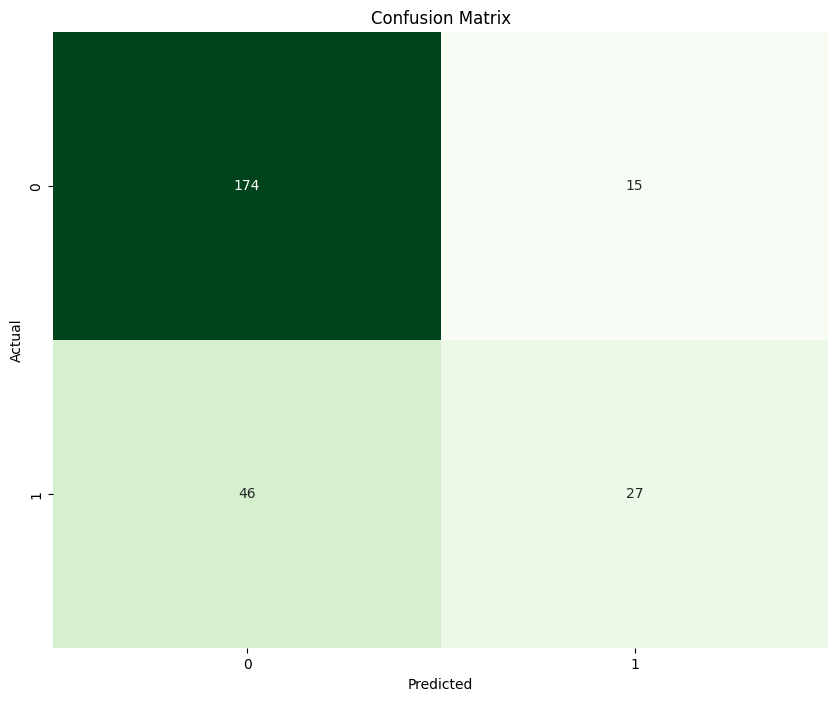

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

acs = accuracy_score(y_test, pred)
print(f"Accuracy score: {round((acs * 100), 2)} % \n")

cr = classification_report(y_test, pred)
print(f"Classification report: \n {cr}")

cm = confusion_matrix(y_test, pred)

plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, cmap = "Greens", fmt = "d", cbar = False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
#Hyperparamater Tuning

from sklearn.model_selection import GridSearchCV

params = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
grid = GridSearchCV(model, params, cv = 5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'C': 0.1, 'solver': 'liblinear'}


Accuracy score: 76.72 % 

Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       189
           1       0.64      0.37      0.47        73

    accuracy                           0.77       262
   macro avg       0.72      0.65      0.66       262
weighted avg       0.75      0.77      0.74       262



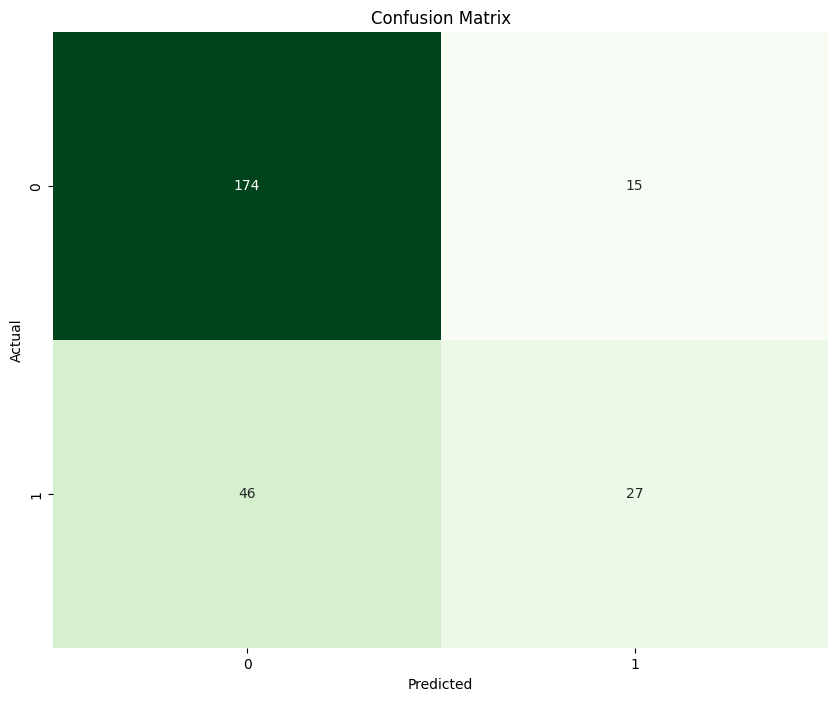

In [48]:
#After tuning

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

model = LogisticRegression(C = 0.1, solver = 'liblinear')
model.fit(X_train, y_train)
pred = model.predict(X_test)

acs = accuracy_score(y_test, pred)
print(f"Accuracy score: {round((acs * 100), 2)} % \n")

cr = classification_report(y_test, pred)
print(f"Classification report: \n {cr}")

cm = confusion_matrix(y_test, pred)

plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, cmap = "Greens", fmt = "d", cbar = False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

There is not any difference. Thus, we will use lazypredict for the best model


In [50]:
pip install lazypredict

In [54]:
from lazypredict.Supervised import LazyClassifier

lazy = LazyClassifier()

models, predictions = lazy.fit(X_train, X_test, y_train, y_test)

print(models.sort_values(by = "Accuracy", ascending = False))

 84%|████████▍ | 27/32 [00:02<00:00, 11.20it/s]/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
 97%|█████████▋| 31/32 [00:02<00:00, 13.42it/s]/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.w

[LightGBM] [Info] Number of positive: 269, number of negative: 778
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 253
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256925 -> initscore=-1.062015
[LightGBM] [Info] Start training from score -1.062015
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.80               0.71     0.71      0.79   
LinearDiscriminantAnalysis         0.79               0.69     0.69      0.77   
SVC                                0.79               0.68     0.68      0.77   
CalibratedClassifierCV             0.77               0.64     0.64      0.75   
RidgeClassifier            

In [ ]:
#Logistic regression is 6th the best model for us. Accuracy is approximately to 77 %, not too bad.